### Pointers and To Do

1. Run a k-means cluster analysis
2. Identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables. 

### Dataset and Its Description
Fisher's Iris Dataset is use to build the k-means clustring.
Contains 3 classes in target variable each having 50 records.
Target:- Class of the Plant

Dataset is download from the sklearn API

#### Variables Description:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import  datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

rnd_state = 1789

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


With the help of the PCA and Plot we see that one class is completely Linear seperable while 
two other classes are not from below findings

In [18]:
# Do the PCA on the Iris Dataset
pca_trans = PCA(n_components=2).fit_transform(iris_data.iloc[:, :4])

Text(0.5, 1.0, 'PCA on Iris dataset')

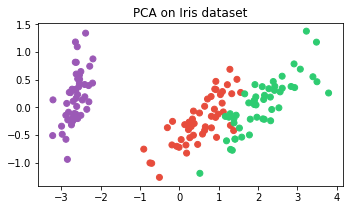

In [19]:
colors=["#2ecc71", "#e74c3c","#9b59b6"]
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.scatter(list(map(lambda tup: tup[0], pca_trans)),
            list(map(lambda tup: tup[1], pca_trans)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", iris_data.target)))
plt.title('PCA on Iris dataset')

In [31]:
(pred_train, pred_test,
 tar_train, tar_test) = train_test_split(iris_data.iloc[:, :4], iris_data.target, test_size = .3, random_state = rnd_state)

In [32]:
classifier = KMeans(n_clusters=3).fit(pred_train)
prediction = classifier.predict(pred_test)

In [33]:
pca_transformed = PCA(n_components=2).fit_transform(pred_test)

Predicted classes 1 and 2 mismatch the real ones, so the code block below fixes that problem.

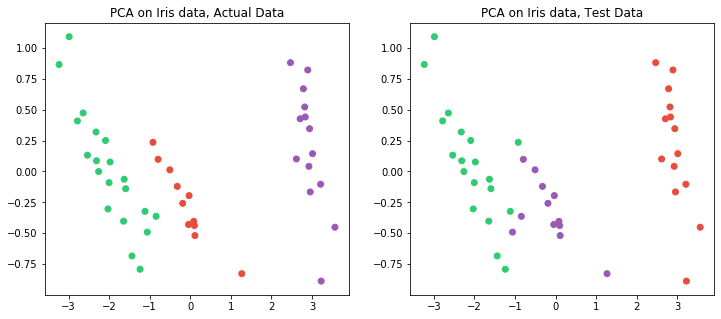

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", tar_test)))
plt.title('PCA on Iris data, Actual Data');

plt.subplot(122)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", prediction)))
plt.title('PCA on Iris data, Test Data');

In [36]:
print('Confusion matrix:\n', pd.crosstab(tar_test, prediction, colnames=['Actual'], rownames=['Predicted'], margins=True))
print('\nAccuracy: ', accuracy_score(tar_test, prediction))

Confusion matrix:
 Actual      0   1   2  All
Predicted                 
0.0         0  14   0   14
1.0        10   0   1   11
2.0         2   0  18   20
All        12  14  19   45

Accuracy:  0.4


### Insights
K-means Algo is run on the Iris Dataset.
Dataset is split into train test in 70:30 ratio
We for 3 cluster to represent the Iris Setosa, Iris Versicolour, Iris Virginica Classes

Confusion matrix and Accuracy are calculated above cell.